In [1]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import pandas as pd
from collections import OrderedDict
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Get stats for MS Dhoni

In [4]:
url="http://stats.espncricinfo.com/ci/engine/player/28081.html?class=2;template=results;type=batting;view=innings"
html = urllib.request.urlopen(url, context=ctx).read()

In [5]:
temp_data=OrderedDict()
list_of_dict=[]
bs=BeautifulSoup(html, "lxml")
table_body=bs.find_all('tbody')
rows = table_body[1].find_all('tr')
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    temp_data=OrderedDict()
    for i in range(len(cols)):
    	temp_data["Runs"]=cols[0]
    	temp_data["Mins"]=cols[1]
    	temp_data["BF"]=cols[2]
    	temp_data["4s"]=cols[3]
    	temp_data["6s"]=cols[4]
    	temp_data["SR"]=cols[5]
    	temp_data["POS"]=cols[6]
    	temp_data["Dismissal"]=cols[7]
    	temp_data["Inns"]=cols[8]
    	temp_data["Opposition"]=cols[10]
    	temp_data["Ground"]	=cols[11]
    	temp_data["Date"]=cols[12]
    list_of_dict.append(temp_data)	

In [6]:
df=pd.DataFrame(list_of_dict)

In [7]:
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7*,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005
5,28,36,24,5,0,116.66,3,caught,2,v Pakistan,Jamshedpur,9 Apr 2005
6,47,90,64,4,1,73.43,3,caught,1,v Pakistan,Ahmedabad,12 Apr 2005
7,11,20,16,1,0,68.75,3,caught,1,v Pakistan,Kanpur,15 Apr 2005
8,24,71,38,2,0,63.15,3,caught,2,v Pakistan,Delhi,17 Apr 2005
9,2,17,7,0,0,28.57,2,bowled,1,v Sri Lanka,Dambulla,30 Jul 2005


In [8]:
writer = ExcelWriter('ms-dhoni.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()

In [9]:
#Data Analysis
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7*,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005
5,28,36,24,5,0,116.66,3,caught,2,v Pakistan,Jamshedpur,9 Apr 2005
6,47,90,64,4,1,73.43,3,caught,1,v Pakistan,Ahmedabad,12 Apr 2005
7,11,20,16,1,0,68.75,3,caught,1,v Pakistan,Kanpur,15 Apr 2005
8,24,71,38,2,0,63.15,3,caught,2,v Pakistan,Delhi,17 Apr 2005
9,2,17,7,0,0,28.57,2,bowled,1,v Sri Lanka,Dambulla,30 Jul 2005


In [13]:
def formatRuns(runs):
    runs = runs.replace("*",'')
    try:
        return int(runs)
    except:
        return 0

In [14]:
df['Runs'] = df['Runs'].apply(lambda runs: formatRuns(runs))

In [15]:
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005
5,28,36,24,5,0,116.66,3,caught,2,v Pakistan,Jamshedpur,9 Apr 2005
6,47,90,64,4,1,73.43,3,caught,1,v Pakistan,Ahmedabad,12 Apr 2005
7,11,20,16,1,0,68.75,3,caught,1,v Pakistan,Kanpur,15 Apr 2005
8,24,71,38,2,0,63.15,3,caught,2,v Pakistan,Delhi,17 Apr 2005
9,2,17,7,0,0,28.57,2,bowled,1,v Sri Lanka,Dambulla,30 Jul 2005


In [19]:
def formatDate(date):
    year = date.split(" ")[-1]
    return year

In [20]:
df['Year'] = df['Date'].apply(lambda date: formatDate(date))

In [21]:
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date,Year
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004,2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004,2004
2,7,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004,2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005,2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005,2005
5,28,36,24,5,0,116.66,3,caught,2,v Pakistan,Jamshedpur,9 Apr 2005,2005
6,47,90,64,4,1,73.43,3,caught,1,v Pakistan,Ahmedabad,12 Apr 2005,2005
7,11,20,16,1,0,68.75,3,caught,1,v Pakistan,Kanpur,15 Apr 2005,2005
8,24,71,38,2,0,63.15,3,caught,2,v Pakistan,Delhi,17 Apr 2005,2005
9,2,17,7,0,0,28.57,2,bowled,1,v Sri Lanka,Dambulla,30 Jul 2005,2005


In [37]:
res = df.groupby(['Year']).agg({'Runs': 'sum','Opposition':'count'})

In [38]:
res=res.rename(columns = {'Opposition':'Matches'})

In [40]:
res.reset_index(level=0, inplace=True)
res

,Year,Runs,Matches
0,2004,19,3
1,2005,895,27
2,2006,821,29
3,2007,1103,37
4,2008,1097,29
5,2009,1198,29
6,2010,600,18
7,2011,764,24
8,2012,524,16
9,2013,753,26


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1440 with 0 Axes>

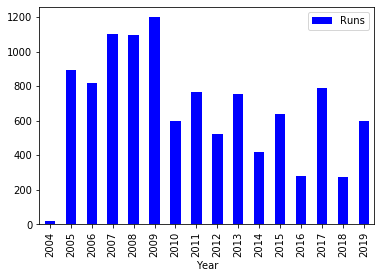

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
res.plot(kind='bar',x="Year",y='Runs',color='Blue')
plt.savefig("file.jpg",dpi=200)
plt.show

In [47]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

<Figure size 1332x756 with 0 Axes>